# Actividad 2.2

#### Cargamos librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos el archivo en un DataFrame

In [3]:
df = pd.read_excel('DataAnalytics3.xlsx')
df.head()

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
0,Nicolas,Nicolas,Correcto,5.399169,Despegue,1,blue,Episodio 1,1969-12-31 18:00:45.316,Astro,No,0.0,0.0
1,Nicolas,Nicolas,Incorrecto,1.283400,Despegue,2,violet,Episodio 1,1969-12-31 18:00:45.316,Astro,No,0.0,0.0
2,Nicolas,Nicolas,Correcto,2.700226,Despegue,3,green,Episodio 1,1969-12-31 18:00:45.316,Astro,No,0.0,0.0
3,Nicolas,Nicolas,Incorrecto,3.050262,Despegue,4,green,Episodio 1,1969-12-31 18:00:45.316,Astro,No,0.0,0.0
4,Nicolas,Nicolas,Incorrecto,4.750256,Despegue,5,green,Episodio 1,1969-12-31 18:00:45.316,Astro,No,0.0,0.0


#### Corroboramos que no tenga valores nulos nuestro DataFrame

In [4]:
df.isnull().sum()

administrador                        0
usuario                              0
presionó botón correcto              0
tiempo de interacción                0
mini juego                           0
número de interacción por lección    0
color presionado                     0
dificultad                           0
fecha                                0
juego                                0
auto push                            0
tiempo de lección                    0
tiempo de sesión                     0
dtype: int64

#### Convertimos las variables categóricas ordinales a numéricas respecto a su frecuencia

Lista de columnas a transformar

In [5]:
ordinales = ['administrador', 'usuario', 'presionó botón correcto', 'mini juego', 'color presionado', 'dificultad', 'juego', 'auto push']

Creamos una copia del DataFrame para no modificar el original directamente

In [6]:
df1 = df.copy()

Reemplazamos los valores en las columnas ordinales por números consecutivos según su frecuencia

In [7]:
for col in ordinales:
    frecuencia = df[col].value_counts().index #value_counts() cuenta la frecuencia de cada valor en la columna y los ordena de mayor a menor.
    df1[col] = df[col].apply(lambda x: frecuencia.get_loc(x) + 1) #Para cada valor en la columna, buscamos su posición en freq_order y asignamos un número
                                                                  #consecutivo empezando desde 1. apply() aplica una operación a cada elemento de la columna.
                                                                  #frecuencia.get_loc(x): Devuelve el índice del valor x dentro de frecuencia.
                                                                  #Se suma 1 para que los números comiencen desde 1 en lugar de 0.
                                                                  #lambda x será la función que hace la siguiente operación.
df1

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
0,2,3,2,5.399169,9,1,4,1,1969-12-31 18:00:45.316,1,1,0.000000,0.000000
1,2,3,1,1.283400,9,2,1,1,1969-12-31 18:00:45.316,1,1,0.000000,0.000000
2,2,3,2,2.700226,9,3,2,1,1969-12-31 18:00:45.316,1,1,0.000000,0.000000
3,2,3,1,3.050262,9,4,2,1,1969-12-31 18:00:45.316,1,1,0.000000,0.000000
4,2,3,1,4.750256,9,5,2,1,1969-12-31 18:00:45.316,1,1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,32,3,999.000000,10,0,5,1,1969-12-31 18:00:45.440,1,2,999.000000,332.240000
5861,1,4,1,2.135419,1,1,2,3,1969-12-31 18:00:45.388,1,1,0.000000,0.000000
5862,1,4,3,999.000000,1,0,5,3,1969-12-31 18:00:45.388,1,2,2.271806,9999.000000
5863,1,4,3,999.000000,10,0,5,3,1969-12-31 18:00:45.388,1,2,999.000000,6.478299


In [8]:
frecuencias_por_columna = {col: df1[col].value_counts() for col in df1.columns}
frecuencias_por_columna

{'administrador': administrador
 1     3260
 2      440
 3      371
 4      302
 5      243
 6      228
 7      224
 8      199
 9      163
 10     158
 11     128
 12      98
 13      51
 Name: count, dtype: int64,
 'usuario': usuario
 1     546
 2     487
 3     440
 4     394
 5     371
 6     356
 7     332
 8     280
 9     243
 10    228
 11    228
 12    224
 13    163
 14    158
 15    152
 16    128
 17    126
 18    103
 19     98
 20     96
 21     94
 22     86
 23     75
 24     74
 25     71
 26     64
 27     51
 28     49
 29     44
 30     39
 31     29
 32     24
 33     10
 34      2
 Name: count, dtype: int64,
 'presionó botón correcto': presionó botón correcto
 1    2590
 2    2513
 3     762
 Name: count, dtype: int64,
 'tiempo de interacción': tiempo de interacción
 999.000000    762
 0.000000      211
 6.534415       14
 0.016632       13
 7.227207        8
              ... 
 9.534184        1
 6.316568        1
 7.018308        1
 7.099429        1
 22.467780 

### Heatmap general

In [9]:
Corr_Factors= df1.corr()
Corr_Factors

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,1.000000,0.351854,0.151109,0.052396,0.053984,-0.170767,0.041980,-0.099609,-0.277173,0.080074,0.046640,0.006538,0.062827
usuario,0.351854,1.000000,0.192152,0.092463,0.259280,-0.258047,0.073789,-0.054405,-0.021445,0.350355,0.143636,0.060985,0.074418
presionó botón correcto,0.151109,0.192152,1.000000,0.731586,0.232161,-0.271423,0.456837,0.021313,0.027595,0.055934,0.672249,0.401550,0.653873
tiempo de interacción,0.052396,0.092463,0.731586,1.000000,0.239646,-0.124521,0.618858,0.019123,0.005293,0.033294,0.869086,0.545157,0.887719
mini juego,0.053984,0.259280,0.232161,0.239646,1.000000,-0.194186,0.179507,-0.156931,0.037790,0.625713,0.251216,0.433412,0.067697
número de interacción por lección,-0.170767,-0.258047,-0.271423,-0.124521,-0.194186,1.000000,-0.259944,-0.149755,-0.060724,-0.157183,-0.139324,-0.081010,-0.131914
color presionado,0.041980,0.073789,0.456837,0.618858,0.179507,-0.259944,1.000000,0.027161,0.021995,0.056677,0.538563,0.340501,0.554462
dificultad,-0.099609,-0.054405,0.021313,0.019123,-0.156931,-0.149755,0.027161,1.000000,-0.030257,-0.115208,0.004457,0.123253,-0.031256
fecha,-0.277173,-0.021445,0.027595,0.005293,0.037790,-0.060724,0.021995,-0.030257,1.000000,-0.014899,0.008553,0.000539,0.005051
juego,0.080074,0.350355,0.055934,0.033294,0.625713,-0.157183,0.056677,-0.115208,-0.014899,1.000000,0.092445,0.001608,0.030418


In [10]:
corr_Factors1= abs(Corr_Factors)
corr_Factors1

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,1.000000,0.351854,0.151109,0.052396,0.053984,0.170767,0.041980,0.099609,0.277173,0.080074,0.046640,0.006538,0.062827
usuario,0.351854,1.000000,0.192152,0.092463,0.259280,0.258047,0.073789,0.054405,0.021445,0.350355,0.143636,0.060985,0.074418
presionó botón correcto,0.151109,0.192152,1.000000,0.731586,0.232161,0.271423,0.456837,0.021313,0.027595,0.055934,0.672249,0.401550,0.653873
tiempo de interacción,0.052396,0.092463,0.731586,1.000000,0.239646,0.124521,0.618858,0.019123,0.005293,0.033294,0.869086,0.545157,0.887719
mini juego,0.053984,0.259280,0.232161,0.239646,1.000000,0.194186,0.179507,0.156931,0.037790,0.625713,0.251216,0.433412,0.067697
número de interacción por lección,0.170767,0.258047,0.271423,0.124521,0.194186,1.000000,0.259944,0.149755,0.060724,0.157183,0.139324,0.081010,0.131914
color presionado,0.041980,0.073789,0.456837,0.618858,0.179507,0.259944,1.000000,0.027161,0.021995,0.056677,0.538563,0.340501,0.554462
dificultad,0.099609,0.054405,0.021313,0.019123,0.156931,0.149755,0.027161,1.000000,0.030257,0.115208,0.004457,0.123253,0.031256
fecha,0.277173,0.021445,0.027595,0.005293,0.037790,0.060724,0.021995,0.030257,1.000000,0.014899,0.008553,0.000539,0.005051
juego,0.080074,0.350355,0.055934,0.033294,0.625713,0.157183,0.056677,0.115208,0.014899,1.000000,0.092445,0.001608,0.030418


<Axes: >

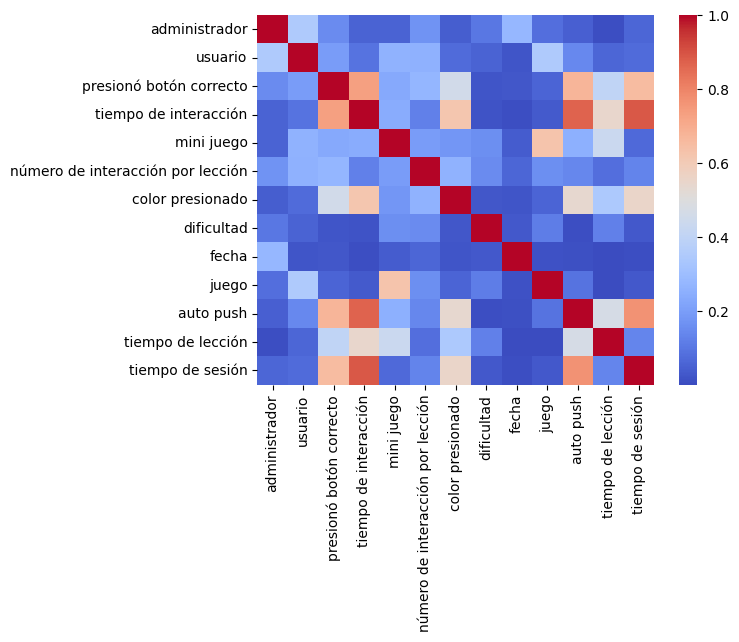

In [11]:
heat_map_general = sns.heatmap(corr_Factors1, cmap='coolwarm')
heat_map_general

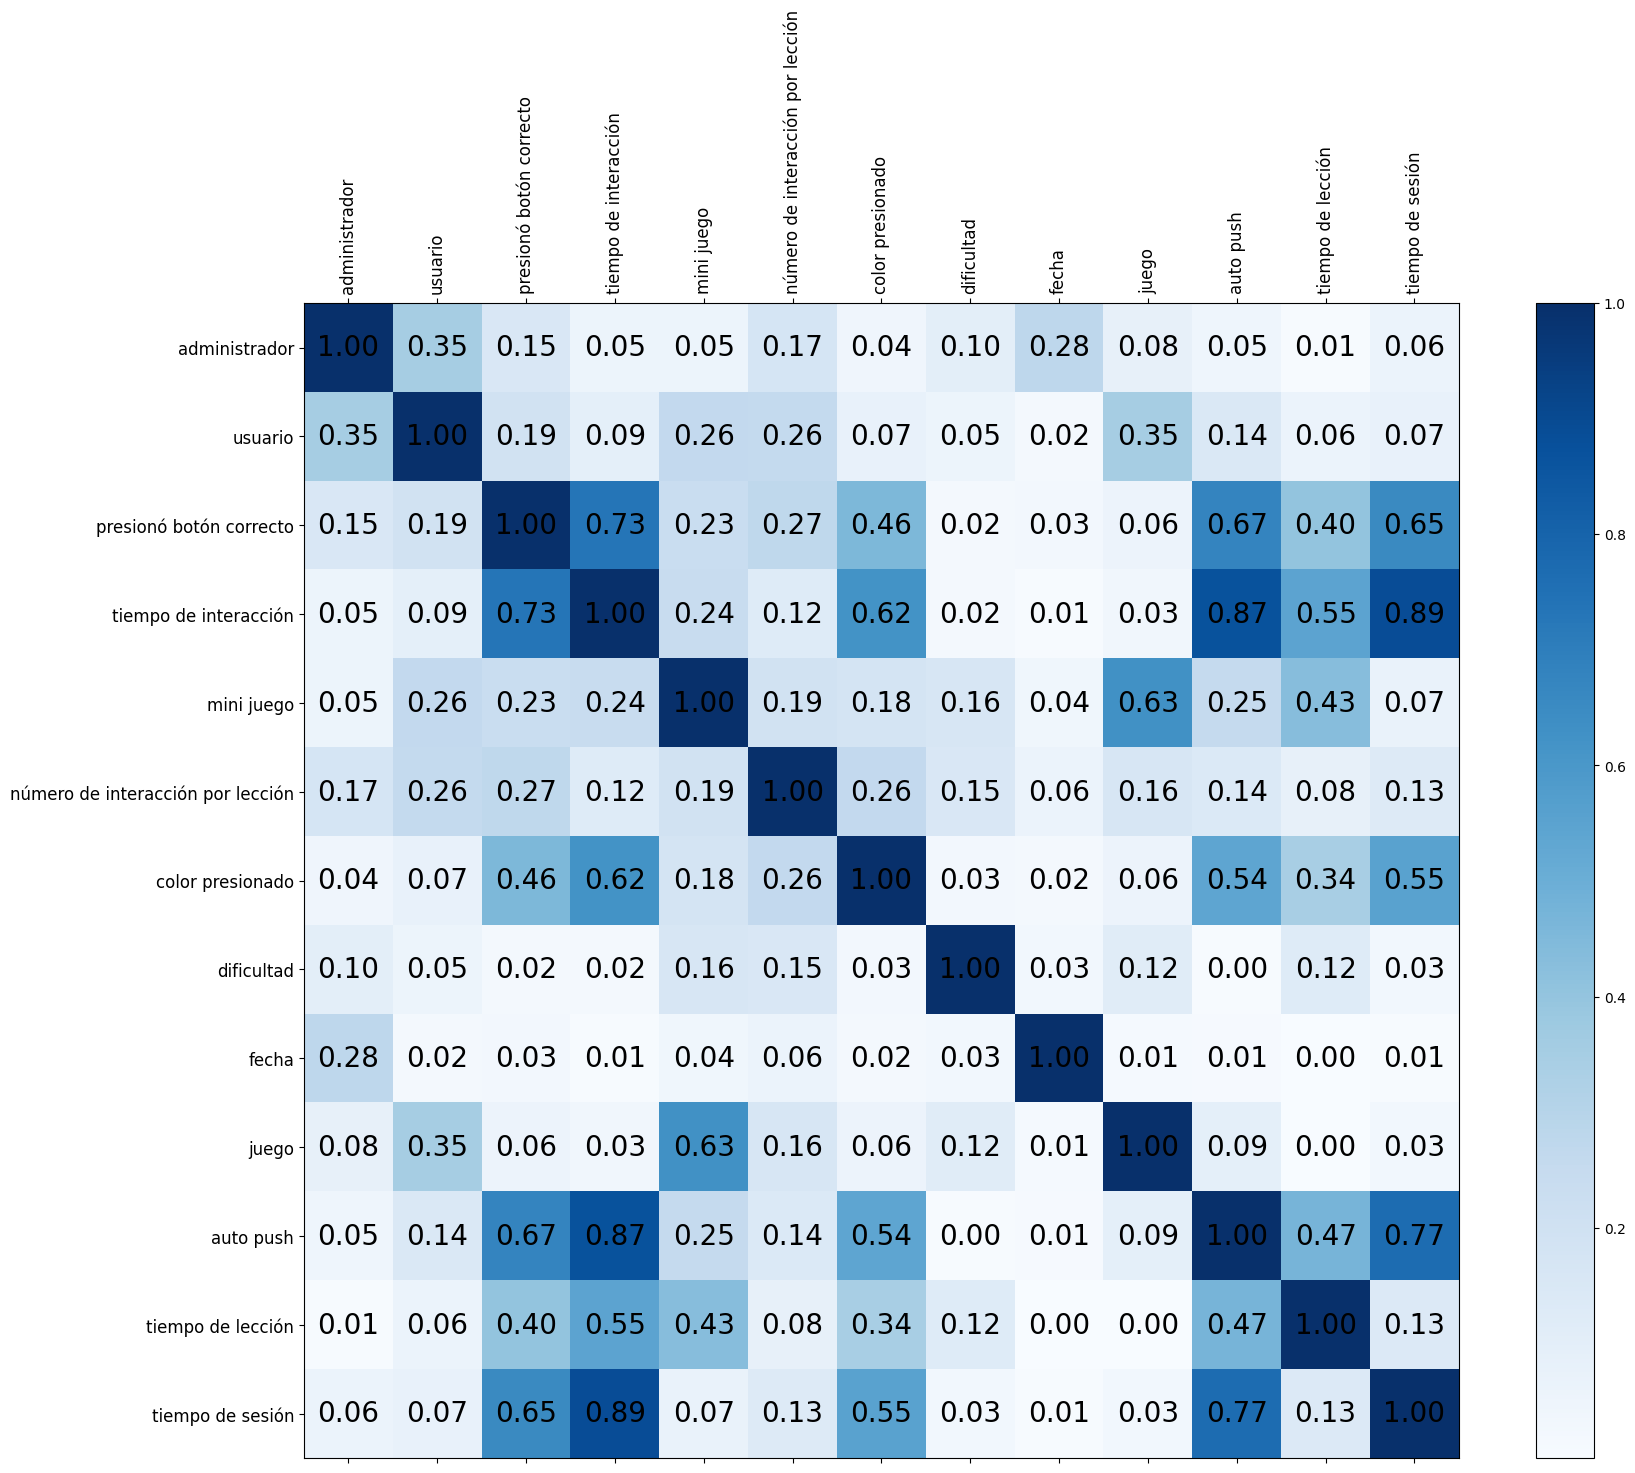

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_Factors1, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_Factors1.shape[0]):
    for j in range(corr_Factors1.shape[1]):
        ax.text(j, i, f"{corr_Factors1.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_Factors1.columns)), corr_Factors1.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_Factors1.index)), corr_Factors1.index, fontsize=12)
plt.show()

### Regresión Multiple

In [13]:
#Declaramos las variables dependientes (sólo va a ser una siempre) e independientea para la regresión líneal
Vars_Indep = df1 [['mini juego', 'número de interacción por lección', 'juego']] #porque son las variables que tienen más correlación con usuario deacuerdo al Heatmap
Vars_Dep = df1['usuario']

In [14]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X= Vars_Indep, y=  Vars_Dep)

LinearRegression()

In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X= Vars_Indep, y= Vars_Dep)
coef_Deter

0.16566717860073732

In [17]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['mini juego', 'número de interacción por lección', 'juego'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.10290649, -0.0523875 ,  4.80658815]),
 'rank_': 3,
 'singular_': array([2313.79909646,  190.68089709,   28.30660207]),
 'intercept_': np.float64(3.426621707400826)}

In [18]:
df1.groupby(['usuario']).count()

,administrador,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
usuario,,,,,,,,,,,,
1,546,546,546,546,546,546,546,546,546,546,546,546
2,487,487,487,487,487,487,487,487,487,487,487,487
3,440,440,440,440,440,440,440,440,440,440,440,440
4,394,394,394,394,394,394,394,394,394,394,394,394
5,371,371,371,371,371,371,371,371,371,371,371,371
6,356,356,356,356,356,356,356,356,356,356,356,356
7,332,332,332,332,332,332,332,332,332,332,332,332
8,280,280,280,280,280,280,280,280,280,280,280,280
9,243,243,243,243,243,243,243,243,243,243,243,243


### Filtro por usuario

**ERICK OSVALDO**

In [47]:
#Visualizamos los datos que tenemos en la columna para hacer el filtro por nombre
frecuencias_df1 = {col: df1[col].value_counts() for col in df1.columns}
frecuencias_df = {col: df[col].value_counts() for col in df.columns}
print(frecuencias_df['usuario'])
print(frecuencias_df1['usuario'])

usuario
Leonardo              546
Aleida                487
Nicolas               440
Jose Javier           394
Leonardo              371
Jesus Alejandro       356
Ramiro Isai           332
Adrian                280
Sergio Angel          243
Denisse               228
Carlos Enrique        228
Yael David            224
Valentin              163
Erick                 158
Iker Benjamin         152
Nicolas |             128
Erick Osvaldo         126
Concepcion            103
Kytzia                 98
Austin                 96
Jose Ignacio Tadeo     94
Jose Ian               86
Ashley                 75
Joshua                 74
Yeremi Yazmin          71
Ma Del Rosario         64
Benjamin               51
Ingrid                 49
Rene                   44
Carlos Abel            39
Arlett                 29
Esmeralda              24
Irving                 10
Jesus Eduardo           2
Name: count, dtype: int64
usuario
1     546
2     487
3     440
4     394
5     371
6     356
7     332
8   

In [48]:
#Erick Ovaldo es el número 17, entonces lo filtramos
EO= df1[(df1['usuario']==17)]
EO.head(5)

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
1943,1,17,1,0.000000,5,1,4,1,1969-12-31 18:00:45.475,2,1,0.0,0.0
1944,1,17,1,6.366849,5,2,4,1,1969-12-31 18:00:45.475,2,1,0.0,0.0
1945,1,17,1,12.051060,5,3,4,1,1969-12-31 18:00:45.475,2,1,0.0,0.0
1946,1,17,1,17.201320,5,4,4,1,1969-12-31 18:00:45.475,2,1,0.0,0.0
1947,1,17,1,19.867560,5,5,4,1,1969-12-31 18:00:45.475,2,1,0.0,0.0


***Correlación Erick Osvaldo***

In [49]:
corr_FactorsEO = EO.corr()
corr_FactorsEO

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,NaN,NaN,1.000000,0.704634,-0.090289,-0.382233,0.309919,0.332413,NaN,NaN,0.603290,0.326378,0.681284
tiempo de interacción,NaN,NaN,0.704634,1.000000,0.005848,-0.384249,0.575176,0.132325,NaN,NaN,0.769989,0.463142,0.966768
mini juego,NaN,NaN,-0.090289,0.005848,1.000000,0.230948,-0.016448,0.060044,NaN,NaN,-0.000136,0.212513,-0.046137
número de interacción por lección,NaN,NaN,-0.382233,-0.384249,0.230948,1.000000,-0.334292,-0.385648,NaN,NaN,-0.133348,-0.181478,-0.378819
color presionado,NaN,NaN,0.309919,0.575176,-0.016448,-0.334292,1.000000,0.017594,NaN,NaN,0.370077,0.267938,0.559297
dificultad,NaN,NaN,0.332413,0.132325,0.060044,-0.385648,0.017594,1.000000,NaN,NaN,0.038135,0.222467,0.087092
fecha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
corr_FactorsEO= abs(corr_FactorsEO)
corr_FactorsEO

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,NaN,NaN,1.000000,0.704634,0.090289,0.382233,0.309919,0.332413,NaN,NaN,0.603290,0.326378,0.681284
tiempo de interacción,NaN,NaN,0.704634,1.000000,0.005848,0.384249,0.575176,0.132325,NaN,NaN,0.769989,0.463142,0.966768
mini juego,NaN,NaN,0.090289,0.005848,1.000000,0.230948,0.016448,0.060044,NaN,NaN,0.000136,0.212513,0.046137
número de interacción por lección,NaN,NaN,0.382233,0.384249,0.230948,1.000000,0.334292,0.385648,NaN,NaN,0.133348,0.181478,0.378819
color presionado,NaN,NaN,0.309919,0.575176,0.016448,0.334292,1.000000,0.017594,NaN,NaN,0.370077,0.267938,0.559297
dificultad,NaN,NaN,0.332413,0.132325,0.060044,0.385648,0.017594,1.000000,NaN,NaN,0.038135,0.222467,0.087092
fecha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


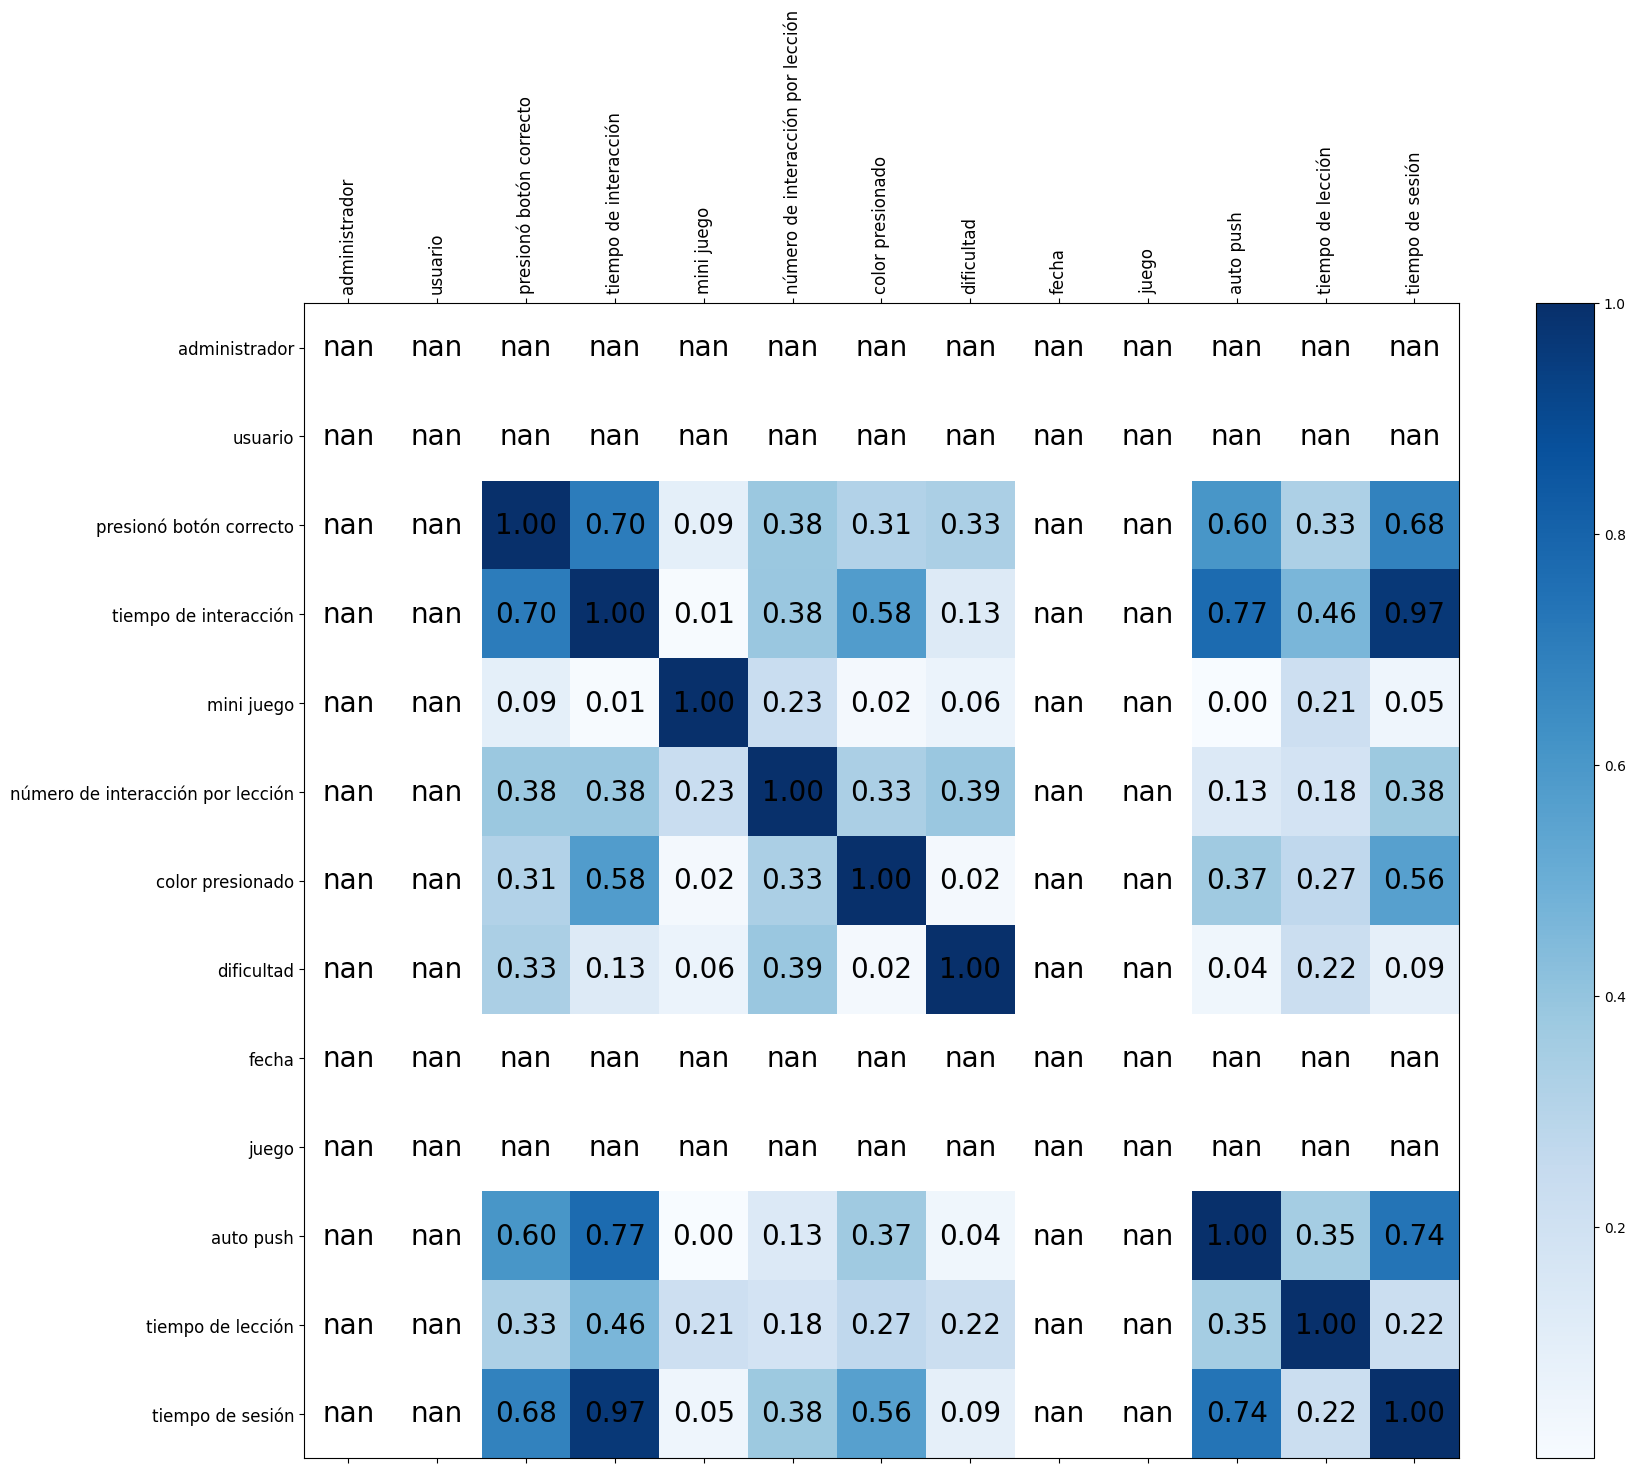

In [51]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_FactorsEO, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_FactorsEO.shape[0]):
    for j in range(corr_FactorsEO.shape[1]):
        ax.text(j, i, f"{corr_FactorsEO.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_FactorsEO.columns)), corr_FactorsEO.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_FactorsEO.index)), corr_FactorsEO.index, fontsize=12)
plt.show()

Los nulos significa que no existe correlación entre las columnas y por eso las llena de valores nulos

***Regresión Multiple de Erick Ovaldo***

In [52]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepV= EO[['tiempo de interacción', 'auto push','tiempo de sesión']]
Var_DepV= EO['presionó botón correcto']

In [53]:
modelEO= LinearRegression()

In [54]:
modelEO.fit(X=Vars_IndepV, y=Var_DepV)

LinearRegression()

In [55]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelEO.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['tiempo de interacción', 'auto push', 'tiempo de sesión'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.25960709e-03, 2.58071687e-01, 4.31023631e-06]),
 'rank_': 3,
 'singular_': array([3.30968861e+04, 8.60963478e+02, 2.75643805e+00]),
 'intercept_': np.float64(1.1828106604469473)}

In [56]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
modelEO.score(Vars_IndepV,Var_DepV)

0.5055911211933041

In [57]:
coef_DeterEO=modelEO.score(X=Vars_IndepV, y=Var_DepV)
coef_DeterEO

0.5055911211933041

In [58]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelEO=np.sqrt(coef_DeterEO)
coef_CorrelEO

np.float64(0.7110493099590942)

In [110]:
# Exportar el dataframe del Filtro Erick Ovaldo
corr_FactorsEO.to_csv('Erick Osvaldo.csv', index=False)

**ESMERALDA**

In [59]:
#Visualizamos los datos que tenemos en la columna para hacer el filtro por nombre
frecuencias_df1 = {col: df1[col].value_counts() for col in df1.columns}
frecuencias_df = {col: df[col].value_counts() for col in df.columns}
print(frecuencias_df['usuario'])
print(frecuencias_df1['usuario'])

usuario
Leonardo              546
Aleida                487
Nicolas               440
Jose Javier           394
Leonardo              371
Jesus Alejandro       356
Ramiro Isai           332
Adrian                280
Sergio Angel          243
Denisse               228
Carlos Enrique        228
Yael David            224
Valentin              163
Erick                 158
Iker Benjamin         152
Nicolas |             128
Erick Osvaldo         126
Concepcion            103
Kytzia                 98
Austin                 96
Jose Ignacio Tadeo     94
Jose Ian               86
Ashley                 75
Joshua                 74
Yeremi Yazmin          71
Ma Del Rosario         64
Benjamin               51
Ingrid                 49
Rene                   44
Carlos Abel            39
Arlett                 29
Esmeralda              24
Irving                 10
Jesus Eduardo           2
Name: count, dtype: int64
usuario
1     546
2     487
3     440
4     394
5     371
6     356
7     332
8   

In [60]:
#Esmeralda es el número 32, entonces la filtramos para poder hacer el análisis
ES= df1[(df1['usuario']==32)]
ES.head(5)

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
5837,1,32,2,4.604386,9,1,4,1,1969-12-31 18:00:45.440,1,1,0.00000,0.0
5838,1,32,2,3.917116,9,2,2,1,1969-12-31 18:00:45.440,1,1,0.00000,0.0
5839,1,32,2,2.199356,9,3,3,1,1969-12-31 18:00:45.440,1,1,0.00000,0.0
5840,1,32,2,2.982496,9,4,1,1,1969-12-31 18:00:45.440,1,1,0.00000,0.0
5841,1,32,3,999.000000,9,0,5,1,1969-12-31 18:00:45.440,1,2,28.79073,9999.0


***Correlación***

In [61]:
corr_FactorsES = ES.corr()
corr_FactorsES

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,NaN,NaN,1.000000,0.867480,0.146923,-0.671642,0.794069,NaN,NaN,NaN,0.870388,0.367500,0.779760
tiempo de interacción,NaN,NaN,0.867480,1.000000,0.101907,-0.702518,0.801930,NaN,NaN,NaN,0.999937,0.422199,0.895820
mini juego,NaN,NaN,0.146923,0.101907,1.000000,-0.127056,0.170392,NaN,NaN,NaN,0.104496,0.396834,-0.077900
número de interacción por lección,NaN,NaN,-0.671642,-0.702518,-0.127056,1.000000,-0.760695,NaN,NaN,NaN,-0.705279,-0.297787,-0.631842
color presionado,NaN,NaN,0.794069,0.801930,0.170392,-0.760695,1.000000,NaN,NaN,NaN,0.804984,0.339885,0.721166
dificultad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
corr_FactorsES= abs(corr_FactorsES)
corr_FactorsES

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,NaN,NaN,1.000000,0.867480,0.146923,0.671642,0.794069,NaN,NaN,NaN,0.870388,0.367500,0.779760
tiempo de interacción,NaN,NaN,0.867480,1.000000,0.101907,0.702518,0.801930,NaN,NaN,NaN,0.999937,0.422199,0.895820
mini juego,NaN,NaN,0.146923,0.101907,1.000000,0.127056,0.170392,NaN,NaN,NaN,0.104496,0.396834,0.077900
número de interacción por lección,NaN,NaN,0.671642,0.702518,0.127056,1.000000,0.760695,NaN,NaN,NaN,0.705279,0.297787,0.631842
color presionado,NaN,NaN,0.794069,0.801930,0.170392,0.760695,1.000000,NaN,NaN,NaN,0.804984,0.339885,0.721166
dificultad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


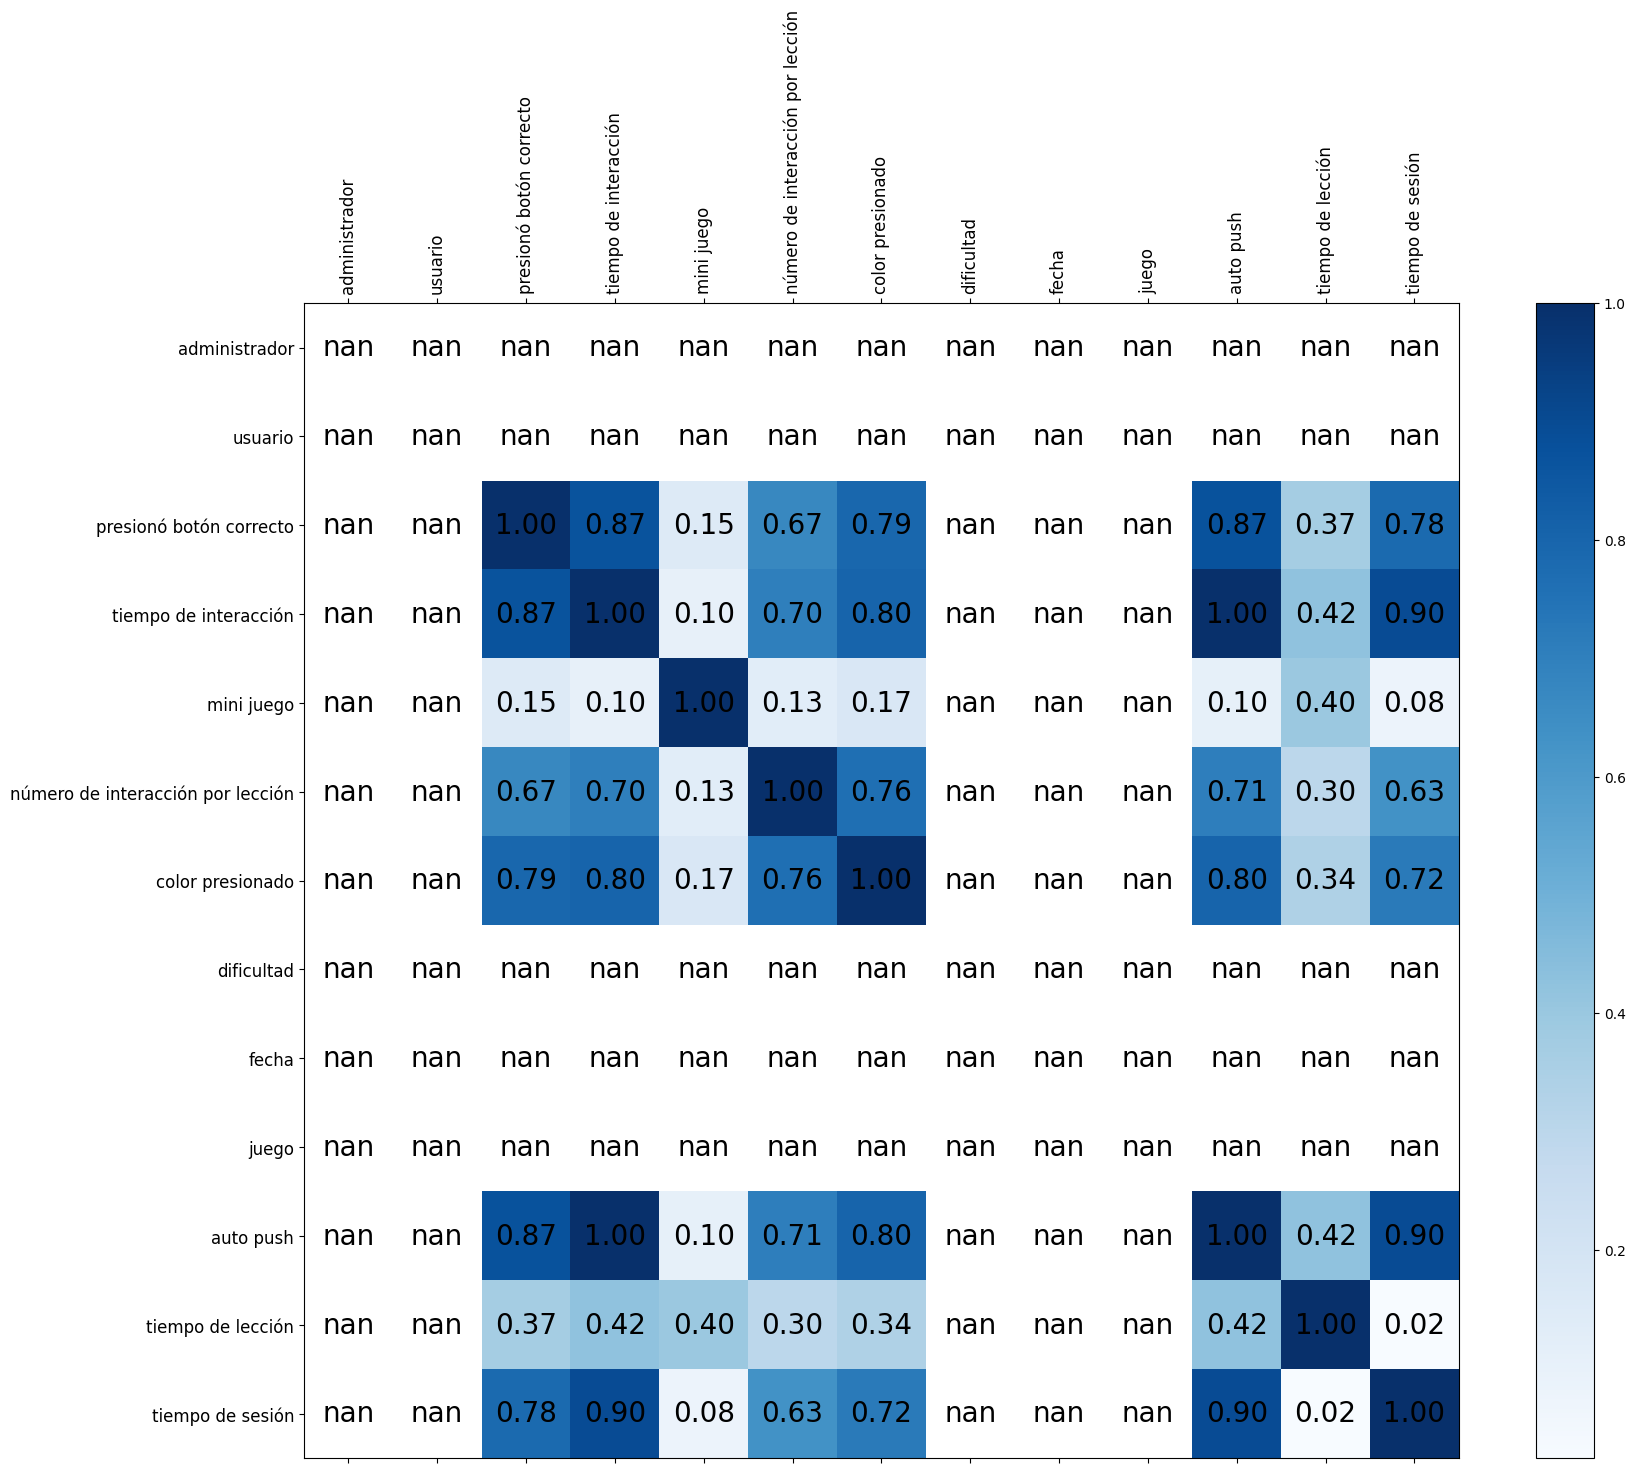

In [63]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_FactorsES, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_FactorsES.shape[0]):
    for j in range(corr_FactorsES.shape[1]):
        ax.text(j, i, f"{corr_FactorsES.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_FactorsES.columns)), corr_FactorsES.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_FactorsES.index)), corr_FactorsES.index, fontsize=12)
plt.show()

***Modelo multiple para Esmeralda***

In [64]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepES= ES[['tiempo de interacción', 'color presionado','auto push']]
Vars_DepES= ES['presionó botón correcto']

In [65]:
modelES= LinearRegression()

In [66]:
modelES.fit(X=Vars_IndepES, y=Vars_DepES)

LinearRegression()

In [67]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelES.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['tiempo de interacción', 'color presionado', 'auto push'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-2.65754391e-02,  3.05646182e-02,  2.73652231e+01]),
 'rank_': 3,
 'singular_': array([2.10313277e+03, 4.72300039e+00, 2.10266014e-02]),
 'intercept_': np.float64(-25.334405531521018)}

In [68]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
modelES.score(Vars_IndepES,Vars_DepES)

0.8248048866301179

In [69]:
coef_DeterES=modelES.score(X=Vars_IndepES, y=Vars_DepES)
coef_DeterES

0.8248048866301179

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelES=np.sqrt(coef_DeterES)
coef_CorrelES

np.float64(0.9081876935029002)

In [111]:
# Exportar el dataframe del Filtro Esmeralda
corr_FactorsES.to_csv('Esmeralda.csv', index=False)

**IKER BENJAMIN**

In [71]:
#Visualizamos los datos que tenemos en la columna para hacer el filtro por nombre
frecuencias_df1 = {col: df1[col].value_counts() for col in df1.columns}
frecuencias_df = {col: df[col].value_counts() for col in df.columns}
print(frecuencias_df['usuario'])
print(frecuencias_df1['usuario'])

usuario
Leonardo              546
Aleida                487
Nicolas               440
Jose Javier           394
Leonardo              371
Jesus Alejandro       356
Ramiro Isai           332
Adrian                280
Sergio Angel          243
Denisse               228
Carlos Enrique        228
Yael David            224
Valentin              163
Erick                 158
Iker Benjamin         152
Nicolas |             128
Erick Osvaldo         126
Concepcion            103
Kytzia                 98
Austin                 96
Jose Ignacio Tadeo     94
Jose Ian               86
Ashley                 75
Joshua                 74
Yeremi Yazmin          71
Ma Del Rosario         64
Benjamin               51
Ingrid                 49
Rene                   44
Carlos Abel            39
Arlett                 29
Esmeralda              24
Irving                 10
Jesus Eduardo           2
Name: count, dtype: int64
usuario
1     546
2     487
3     440
4     394
5     371
6     356
7     332
8   

In [72]:
#Iker Benjamin es el número 15, entonces lo filtramos
IB= df1[(df1['usuario']==15)]
IB.head(5)

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
283,11,15,2,7.224277,9,1,4,1,1969-12-31 18:00:45.317,1,1,0.0,0.0
284,11,15,1,1.549632,9,2,4,1,1969-12-31 18:00:45.317,1,1,0.0,0.0
285,11,15,2,3.999977,9,3,2,1,1969-12-31 18:00:45.317,1,1,0.0,0.0
286,11,15,2,4.584376,9,4,3,1,1969-12-31 18:00:45.317,1,1,0.0,0.0
287,11,15,2,9.249636,9,5,1,1,1969-12-31 18:00:45.317,1,1,0.0,0.0


***Correlación Iker Benjamin***

In [73]:
corr_FactorsIB = IB.corr()
corr_FactorsIB

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,1.000000,NaN,0.096494,0.003119,0.043838,-0.152180,0.045921,-0.005525,-0.999595,-0.254386,-0.023955,-0.018274,0.024749
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,0.096494,NaN,1.000000,0.765908,0.194349,-0.381734,0.530188,0.128587,-0.094238,-0.019999,0.634199,0.398488,0.701417
tiempo de interacción,0.003119,NaN,0.765908,1.000000,0.189180,-0.540188,0.690876,0.158133,-0.003570,-0.011749,0.749657,0.520325,0.915874
mini juego,0.043838,NaN,0.194349,0.189180,1.000000,-0.164563,0.055659,0.186260,-0.030891,0.426003,0.129567,0.432787,0.051462
número de interacción por lección,-0.152180,NaN,-0.381734,-0.540188,-0.164563,1.000000,-0.510334,-0.049830,0.148714,0.071226,-0.258535,-0.284956,-0.501579
color presionado,0.045921,NaN,0.530188,0.690876,0.055659,-0.510334,1.000000,0.072975,-0.049529,-0.098132,0.526057,0.360574,0.634682
dificultad,-0.005525,NaN,0.128587,0.158133,0.186260,-0.049830,0.072975,1.000000,0.014389,0.455393,0.158561,0.180156,0.068092
fecha,-0.999595,NaN,-0.094238,-0.003570,-0.030891,0.148714,-0.049529,0.014389,1.000000,0.273071,0.020996,0.015970,-0.024495
juego,-0.254386,NaN,-0.019999,-0.011749,0.426003,0.071226,-0.098132,0.455393,0.273071,1.000000,0.054584,-0.053979,-0.015069


In [74]:
corr_FactorsIB= abs(corr_FactorsIB)
corr_FactorsIB

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,1.000000,NaN,0.096494,0.003119,0.043838,0.152180,0.045921,0.005525,0.999595,0.254386,0.023955,0.018274,0.024749
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,0.096494,NaN,1.000000,0.765908,0.194349,0.381734,0.530188,0.128587,0.094238,0.019999,0.634199,0.398488,0.701417
tiempo de interacción,0.003119,NaN,0.765908,1.000000,0.189180,0.540188,0.690876,0.158133,0.003570,0.011749,0.749657,0.520325,0.915874
mini juego,0.043838,NaN,0.194349,0.189180,1.000000,0.164563,0.055659,0.186260,0.030891,0.426003,0.129567,0.432787,0.051462
número de interacción por lección,0.152180,NaN,0.381734,0.540188,0.164563,1.000000,0.510334,0.049830,0.148714,0.071226,0.258535,0.284956,0.501579
color presionado,0.045921,NaN,0.530188,0.690876,0.055659,0.510334,1.000000,0.072975,0.049529,0.098132,0.526057,0.360574,0.634682
dificultad,0.005525,NaN,0.128587,0.158133,0.186260,0.049830,0.072975,1.000000,0.014389,0.455393,0.158561,0.180156,0.068092
fecha,0.999595,NaN,0.094238,0.003570,0.030891,0.148714,0.049529,0.014389,1.000000,0.273071,0.020996,0.015970,0.024495
juego,0.254386,NaN,0.019999,0.011749,0.426003,0.071226,0.098132,0.455393,0.273071,1.000000,0.054584,0.053979,0.015069


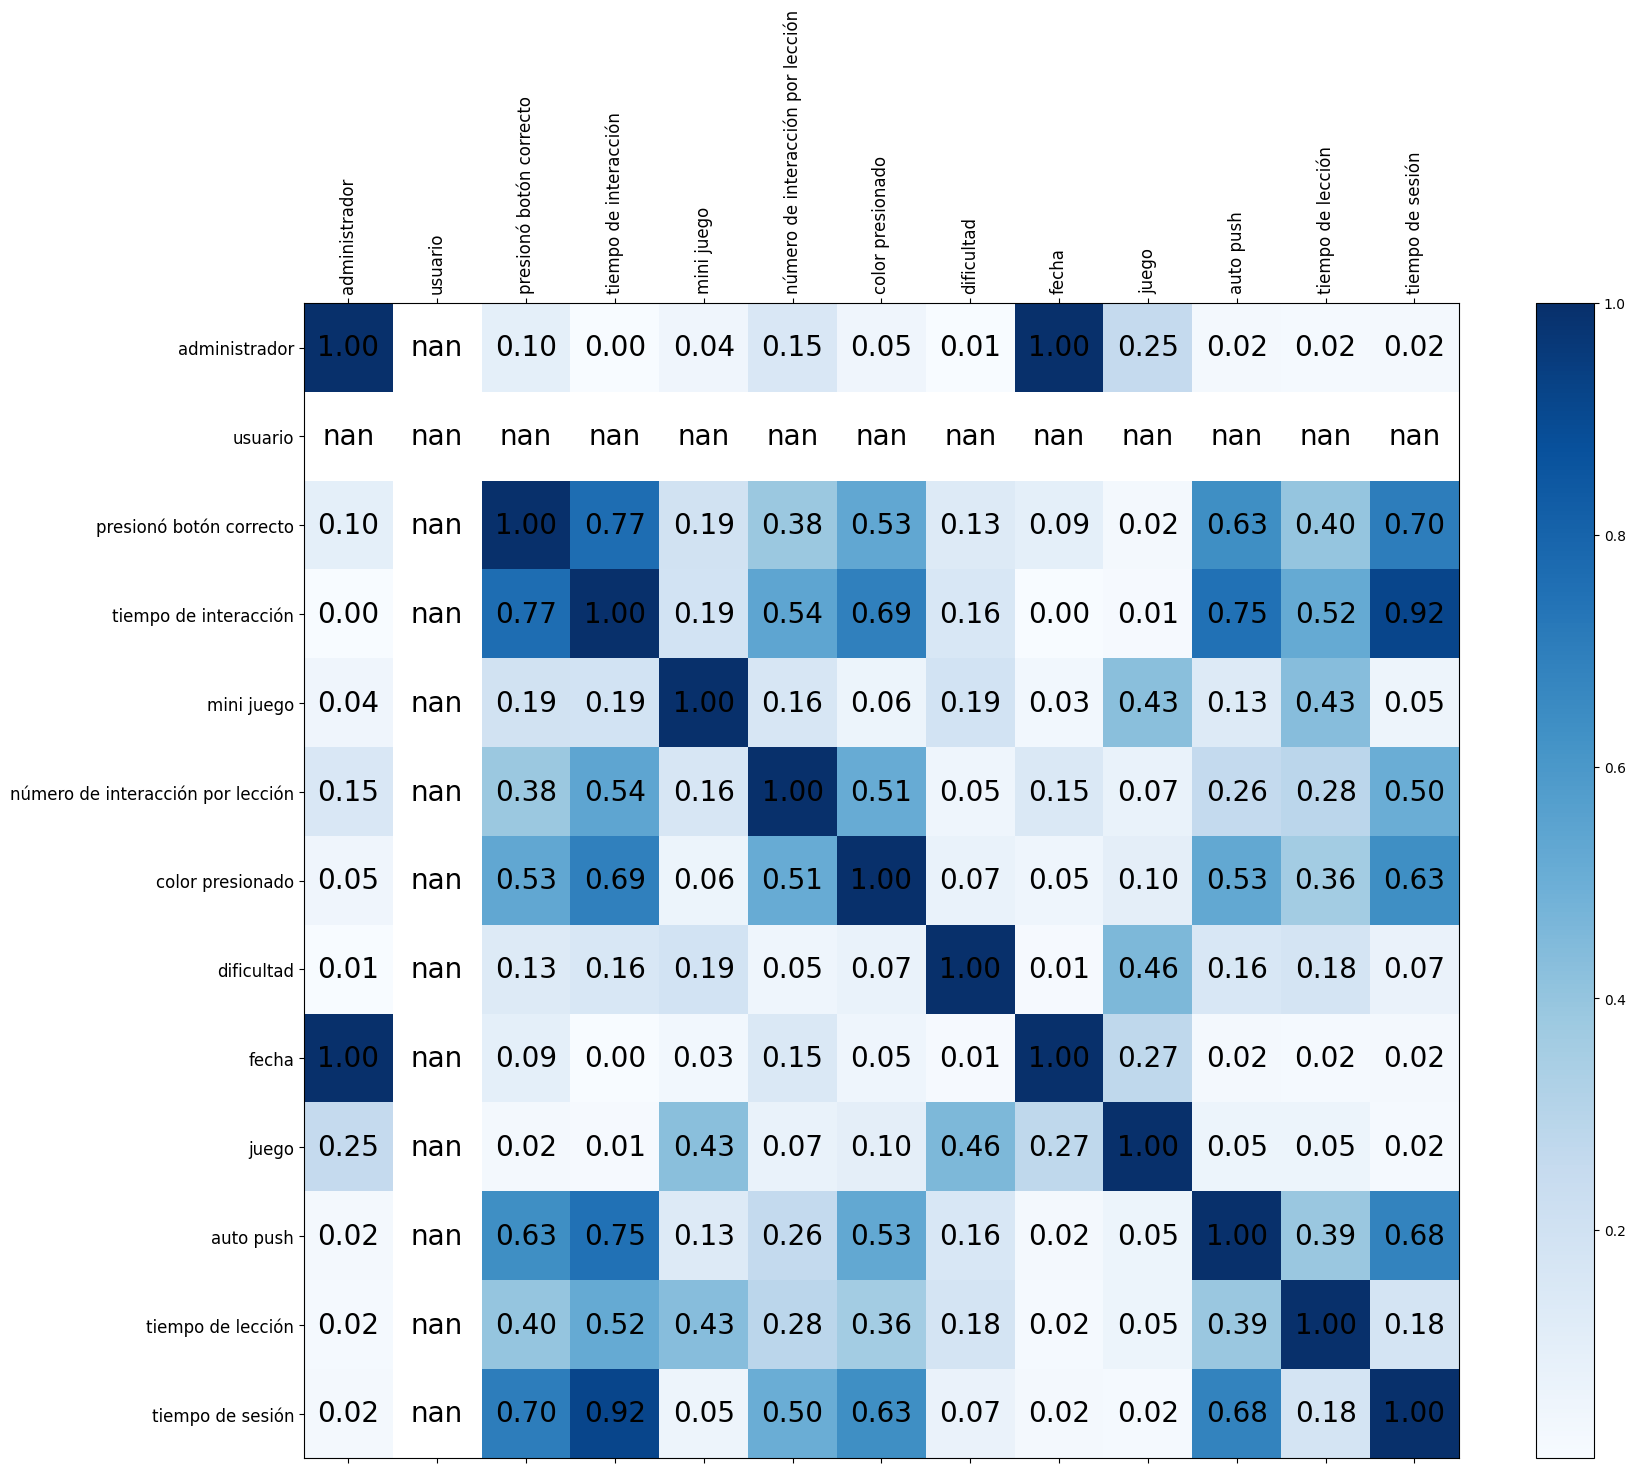

In [75]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_FactorsIB, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_FactorsIB.shape[0]):
    for j in range(corr_FactorsIB.shape[1]):
        ax.text(j, i, f"{corr_FactorsIB.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_FactorsIB.columns)), corr_FactorsIB.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_FactorsIB.index)), corr_FactorsIB.index, fontsize=12)
plt.show()

Los nulos significa que no existe correlación entre las columnas y por eso las llena de valores nulos

***Regresión Multiple de Iker Benjamin***

In [76]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepIB= IB[['tiempo de interacción', 'auto push','tiempo de sesión']]
Var_DepIB= IB['presionó botón correcto']

In [77]:
modelIB= LinearRegression()

In [78]:
modelIB.fit(X=Vars_IndepIB, y=Var_DepIB)

LinearRegression()

In [79]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelIB.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['tiempo de interacción', 'auto push', 'tiempo de sesión'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.23625329e-03, 2.01453062e-01, 1.18569794e-06]),
 'rank_': 3,
 'singular_': array([4.35195436e+04, 1.83106556e+03, 3.87989378e+00]),
 'intercept_': np.float64(1.3503329266733988)}

In [100]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
modelIB.score(Vars_IndepIB,Var_DepIB)

0.5948484724212737

In [101]:
coef_DeterIB=modelIB.score(X=Vars_IndepIB, y=Var_DepIB)
coef_DeterIB

0.5948484724212737

In [102]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelIB=np.sqrt(coef_DeterIB)
coef_CorrelIB

np.float64(0.7712642040321032)

In [112]:
# Exportar el dataframe del Filtro Iker Benjamin
corr_FactorsIB.to_csv('Iker Benjamin.csv', index=False)

**INGRID**

In [83]:
#Visualizamos los datos que tenemos en la columna para hacer el filtro por nombre
frecuencias_df1 = {col: df1[col].value_counts() for col in df1.columns}
frecuencias_df = {col: df[col].value_counts() for col in df.columns}
print(frecuencias_df['usuario'])
print(frecuencias_df1['usuario'])

usuario
Leonardo              546
Aleida                487
Nicolas               440
Jose Javier           394
Leonardo              371
Jesus Alejandro       356
Ramiro Isai           332
Adrian                280
Sergio Angel          243
Denisse               228
Carlos Enrique        228
Yael David            224
Valentin              163
Erick                 158
Iker Benjamin         152
Nicolas |             128
Erick Osvaldo         126
Concepcion            103
Kytzia                 98
Austin                 96
Jose Ignacio Tadeo     94
Jose Ian               86
Ashley                 75
Joshua                 74
Yeremi Yazmin          71
Ma Del Rosario         64
Benjamin               51
Ingrid                 49
Rene                   44
Carlos Abel            39
Arlett                 29
Esmeralda              24
Irving                 10
Jesus Eduardo           2
Name: count, dtype: int64
usuario
1     546
2     487
3     440
4     394
5     371
6     356
7     332
8   

In [84]:
#Ingrid es el número 28, entonces la filtramos para poder hacer el análisis
I= df1[(df1['usuario']==28)]
I.head(5)

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
2069,1,28,1,0.674964,8,1,3,1,1969-12-31 18:00:45.627,2,1,0.0,0.0
2070,1,28,2,0.691902,8,2,4,1,1969-12-31 18:00:45.627,2,1,0.0,0.0
2071,1,28,2,15.867730,8,3,2,1,1969-12-31 18:00:45.627,2,1,0.0,0.0
2072,1,28,1,30.535140,8,4,2,1,1969-12-31 18:00:45.627,2,1,0.0,0.0
2073,1,28,2,41.319240,8,5,3,1,1969-12-31 18:00:45.627,2,3,0.0,0.0


***Correlación de Ingrid***

In [85]:
corr_FactorsI = I.corr()
corr_FactorsI

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,NaN,NaN,1.000000,0.767810,0.356997,-0.388686,0.650469,0.173232,NaN,NaN,0.597433,0.445392,0.654818
tiempo de interacción,NaN,NaN,0.767810,1.000000,0.466824,-0.543905,0.749738,0.218231,NaN,NaN,0.657099,0.582412,0.856266
mini juego,NaN,NaN,0.356997,0.466824,1.000000,-0.259974,0.350221,0.394445,NaN,NaN,0.301702,0.988656,-0.056267
número de interacción por lección,NaN,NaN,-0.388686,-0.543905,-0.259974,1.000000,-0.455324,-0.066715,NaN,NaN,-0.165536,-0.324345,-0.476854
color presionado,NaN,NaN,0.650469,0.749738,0.350221,-0.455324,1.000000,0.050902,NaN,NaN,0.630714,0.436938,0.642389
dificultad,NaN,NaN,0.173232,0.218231,0.394445,-0.066715,0.050902,1.000000,NaN,NaN,0.061888,0.388551,0.017694
fecha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
corr_FactorsI= abs(corr_FactorsI)
corr_FactorsI

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,NaN,NaN,1.000000,0.767810,0.356997,0.388686,0.650469,0.173232,NaN,NaN,0.597433,0.445392,0.654818
tiempo de interacción,NaN,NaN,0.767810,1.000000,0.466824,0.543905,0.749738,0.218231,NaN,NaN,0.657099,0.582412,0.856266
mini juego,NaN,NaN,0.356997,0.466824,1.000000,0.259974,0.350221,0.394445,NaN,NaN,0.301702,0.988656,0.056267
número de interacción por lección,NaN,NaN,0.388686,0.543905,0.259974,1.000000,0.455324,0.066715,NaN,NaN,0.165536,0.324345,0.476854
color presionado,NaN,NaN,0.650469,0.749738,0.350221,0.455324,1.000000,0.050902,NaN,NaN,0.630714,0.436938,0.642389
dificultad,NaN,NaN,0.173232,0.218231,0.394445,0.066715,0.050902,1.000000,NaN,NaN,0.061888,0.388551,0.017694
fecha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
juego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


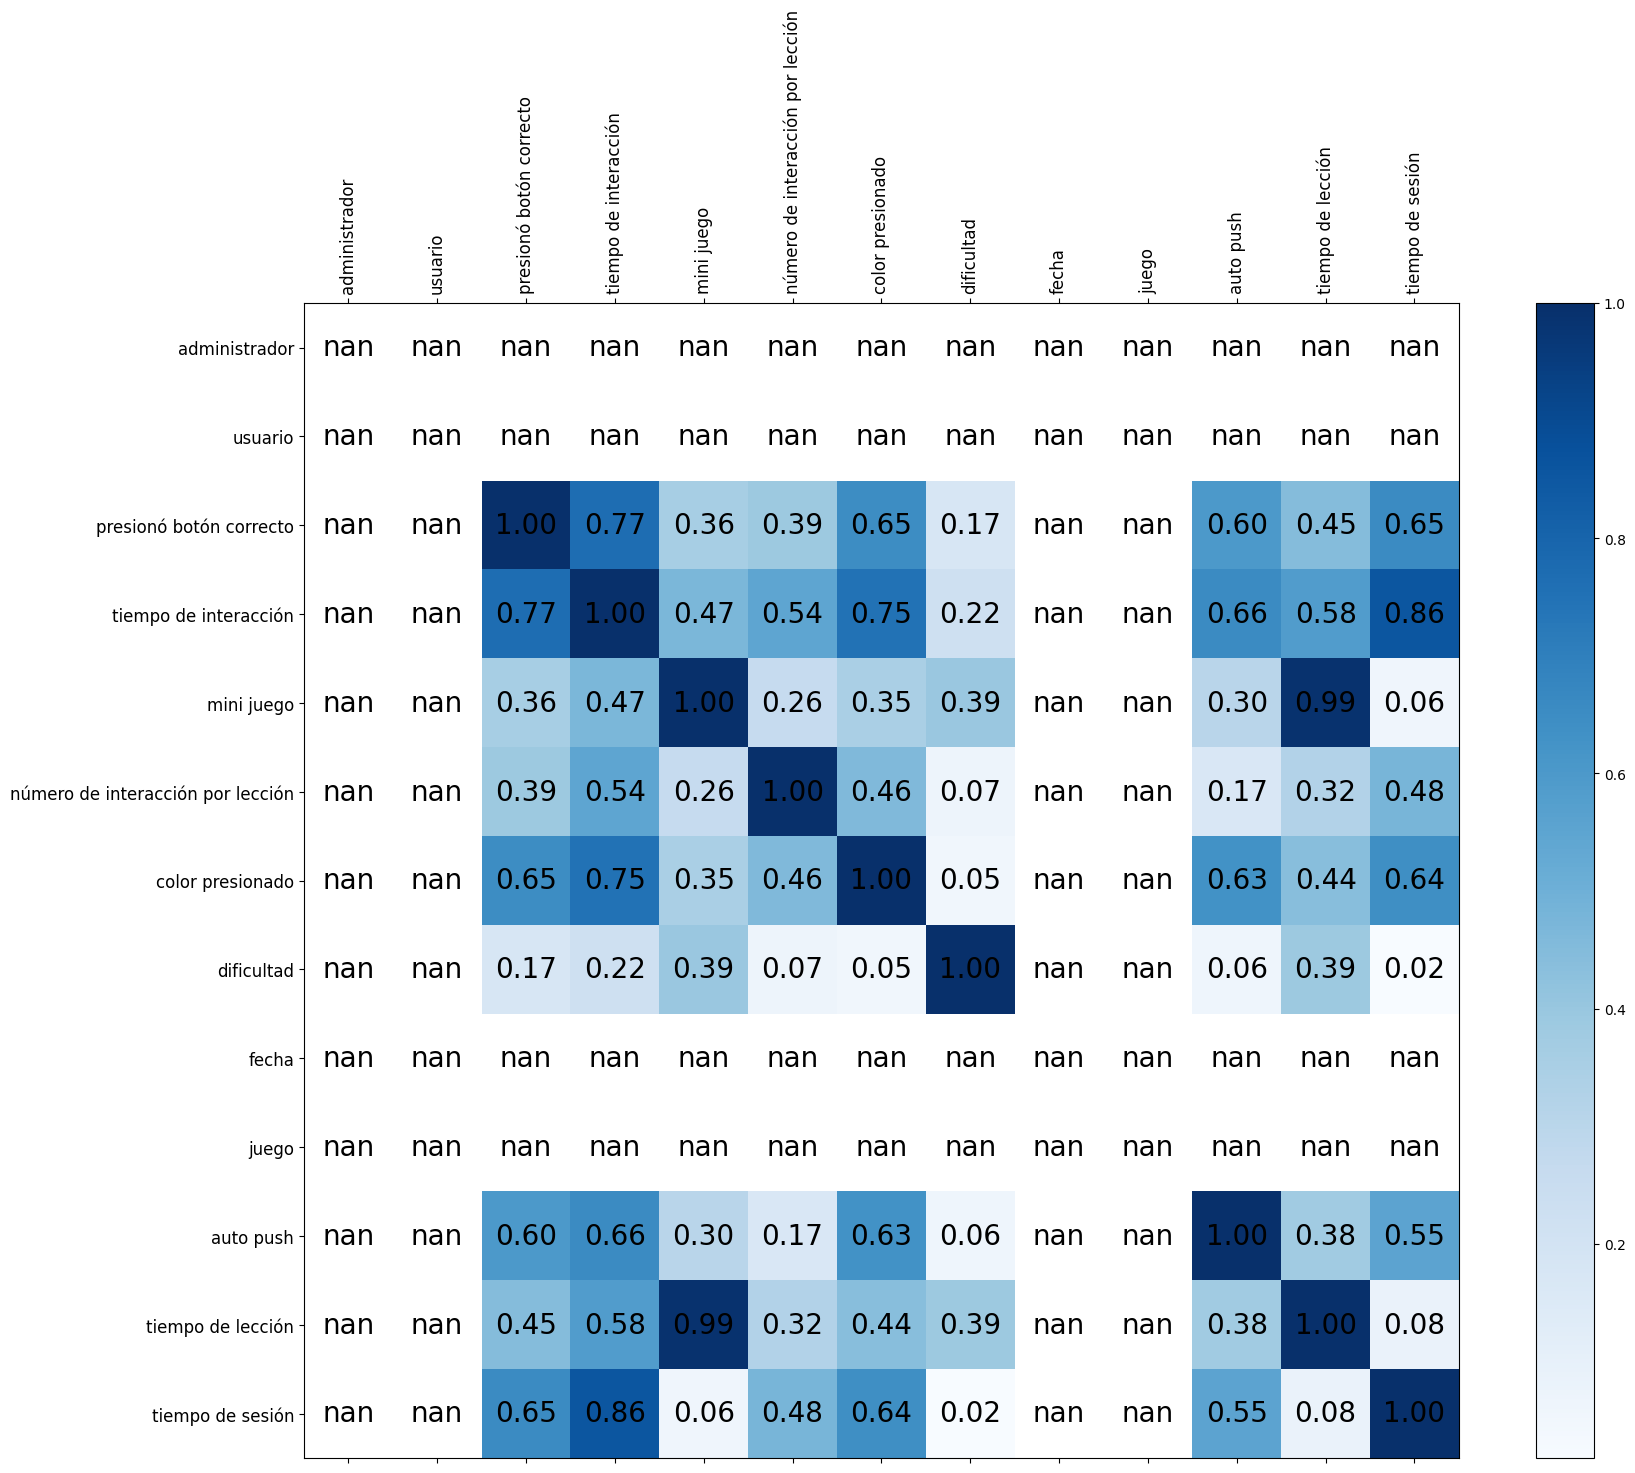

In [87]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_FactorsI, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_FactorsI.shape[0]):
    for j in range(corr_FactorsI.shape[1]):
        ax.text(j, i, f"{corr_FactorsI.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_FactorsI.columns)), corr_FactorsI.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_FactorsI.index)), corr_FactorsI.index, fontsize=12)
plt.show()

***Modelo multiple para Ingrid***

In [88]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepI= I[['tiempo de interacción', 'color presionado','tiempo de sesión']]
Vars_DepI= I['presionó botón correcto']

In [89]:
modelI= LinearRegression()

In [90]:
modelI.fit(X=Vars_IndepI, y=Vars_DepI)

LinearRegression()

In [91]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelI.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['tiempo de interacción', 'color presionado', 'tiempo de sesión'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.26067191e-03,  8.89985453e-02, -2.18917312e-06]),
 'rank_': 3,
 'singular_': array([2.30159847e+04, 1.30984440e+03, 6.29195620e+00]),
 'intercept_': np.float64(1.3172448514573616)}

In [92]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
modelI.score(Vars_IndepI,Vars_DepI)

0.6023406249593026

In [93]:
coef_DeterI=modelI.score(X=Vars_IndepI, y=Vars_DepI)
coef_DeterI

0.6023406249593026

In [94]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelI=np.sqrt(coef_DeterI)
coef_CorrelI

np.float64(0.7761060655344104)

In [113]:
# Exportar el dataframe del Filtro Ingrid
corr_FactorsI.to_csv('Ingrid.csv', index=False)

**JESUS ALEJANDRO**

In [95]:
#Visualizamos los datos que tenemos en la columna para hacer el filtro por nombre
frecuencias_df1 = {col: df1[col].value_counts() for col in df1.columns}
frecuencias_df = {col: df[col].value_counts() for col in df.columns}
print(frecuencias_df['usuario'])
print(frecuencias_df1['usuario'])

usuario
Leonardo              546
Aleida                487
Nicolas               440
Jose Javier           394
Leonardo              371
Jesus Alejandro       356
Ramiro Isai           332
Adrian                280
Sergio Angel          243
Denisse               228
Carlos Enrique        228
Yael David            224
Valentin              163
Erick                 158
Iker Benjamin         152
Nicolas |             128
Erick Osvaldo         126
Concepcion            103
Kytzia                 98
Austin                 96
Jose Ignacio Tadeo     94
Jose Ian               86
Ashley                 75
Joshua                 74
Yeremi Yazmin          71
Ma Del Rosario         64
Benjamin               51
Ingrid                 49
Rene                   44
Carlos Abel            39
Arlett                 29
Esmeralda              24
Irving                 10
Jesus Eduardo           2
Name: count, dtype: int64
usuario
1     546
2     487
3     440
4     394
5     371
6     356
7     332
8   

In [96]:
#Jesus Alejandrp es el número 6, entonces lo filtramos
JA= df1[(df1['usuario']==6)]
JA.head(5)

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
2620,1,6,1,0.000000,5,1,4,1,1969-12-31 18:00:45.335,2,1,0.0,0.0
2621,1,6,2,15.446200,5,2,4,1,1969-12-31 18:00:45.335,2,1,0.0,0.0
2622,1,6,2,7.900033,5,3,4,1,1969-12-31 18:00:45.335,2,1,0.0,0.0
2623,1,6,1,9.168076,5,4,4,1,1969-12-31 18:00:45.335,2,1,0.0,0.0
2624,1,6,2,4.517019,5,5,4,1,1969-12-31 18:00:45.335,2,1,0.0,0.0


***Correlación Jesus Alejandro***

In [97]:
corr_FactorsJA = JA.corr()
corr_FactorsJA

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,NaN,NaN,1.000000,0.736053,0.219853,-0.421337,0.366776,-0.131044,-0.069911,0.126900,0.736743,0.350120,0.675512
tiempo de interacción,NaN,NaN,0.736053,1.000000,0.168344,-0.493535,0.597493,-0.020513,-0.044504,0.043143,0.999870,0.475165,0.916771
mini juego,NaN,NaN,0.219853,0.168344,1.000000,-0.227664,0.084062,0.094631,-0.253160,0.697667,0.167204,0.352469,0.045968
número de interacción por lección,NaN,NaN,-0.421337,-0.493535,-0.227664,1.000000,-0.287864,0.229127,0.112392,-0.172481,-0.495836,-0.235635,-0.454627
color presionado,NaN,NaN,0.366776,0.597493,0.084062,-0.287864,1.000000,0.091236,0.006808,-0.010092,0.597152,0.283783,0.547523
dificultad,NaN,NaN,-0.131044,-0.020513,0.094631,0.229127,0.091236,1.000000,0.173644,0.166217,-0.021104,0.144447,-0.099185
fecha,NaN,NaN,-0.069911,-0.044504,-0.253160,0.112392,0.006808,0.173644,1.000000,-0.318005,-0.042304,-0.027977,-0.045538
juego,NaN,NaN,0.126900,0.043143,0.697667,-0.172481,-0.010092,0.166217,-0.318005,1.000000,0.040757,0.026821,0.028281


In [98]:
corr_FactorsJA= abs(corr_FactorsJA)
corr_FactorsJA

,administrador,usuario,presionó botón correcto,tiempo de interacción,mini juego,número de interacción por lección,color presionado,dificultad,fecha,juego,auto push,tiempo de lección,tiempo de sesión
administrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usuario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presionó botón correcto,NaN,NaN,1.000000,0.736053,0.219853,0.421337,0.366776,0.131044,0.069911,0.126900,0.736743,0.350120,0.675512
tiempo de interacción,NaN,NaN,0.736053,1.000000,0.168344,0.493535,0.597493,0.020513,0.044504,0.043143,0.999870,0.475165,0.916771
mini juego,NaN,NaN,0.219853,0.168344,1.000000,0.227664,0.084062,0.094631,0.253160,0.697667,0.167204,0.352469,0.045968
número de interacción por lección,NaN,NaN,0.421337,0.493535,0.227664,1.000000,0.287864,0.229127,0.112392,0.172481,0.495836,0.235635,0.454627
color presionado,NaN,NaN,0.366776,0.597493,0.084062,0.287864,1.000000,0.091236,0.006808,0.010092,0.597152,0.283783,0.547523
dificultad,NaN,NaN,0.131044,0.020513,0.094631,0.229127,0.091236,1.000000,0.173644,0.166217,0.021104,0.144447,0.099185
fecha,NaN,NaN,0.069911,0.044504,0.253160,0.112392,0.006808,0.173644,1.000000,0.318005,0.042304,0.027977,0.045538
juego,NaN,NaN,0.126900,0.043143,0.697667,0.172481,0.010092,0.166217,0.318005,1.000000,0.040757,0.026821,0.028281


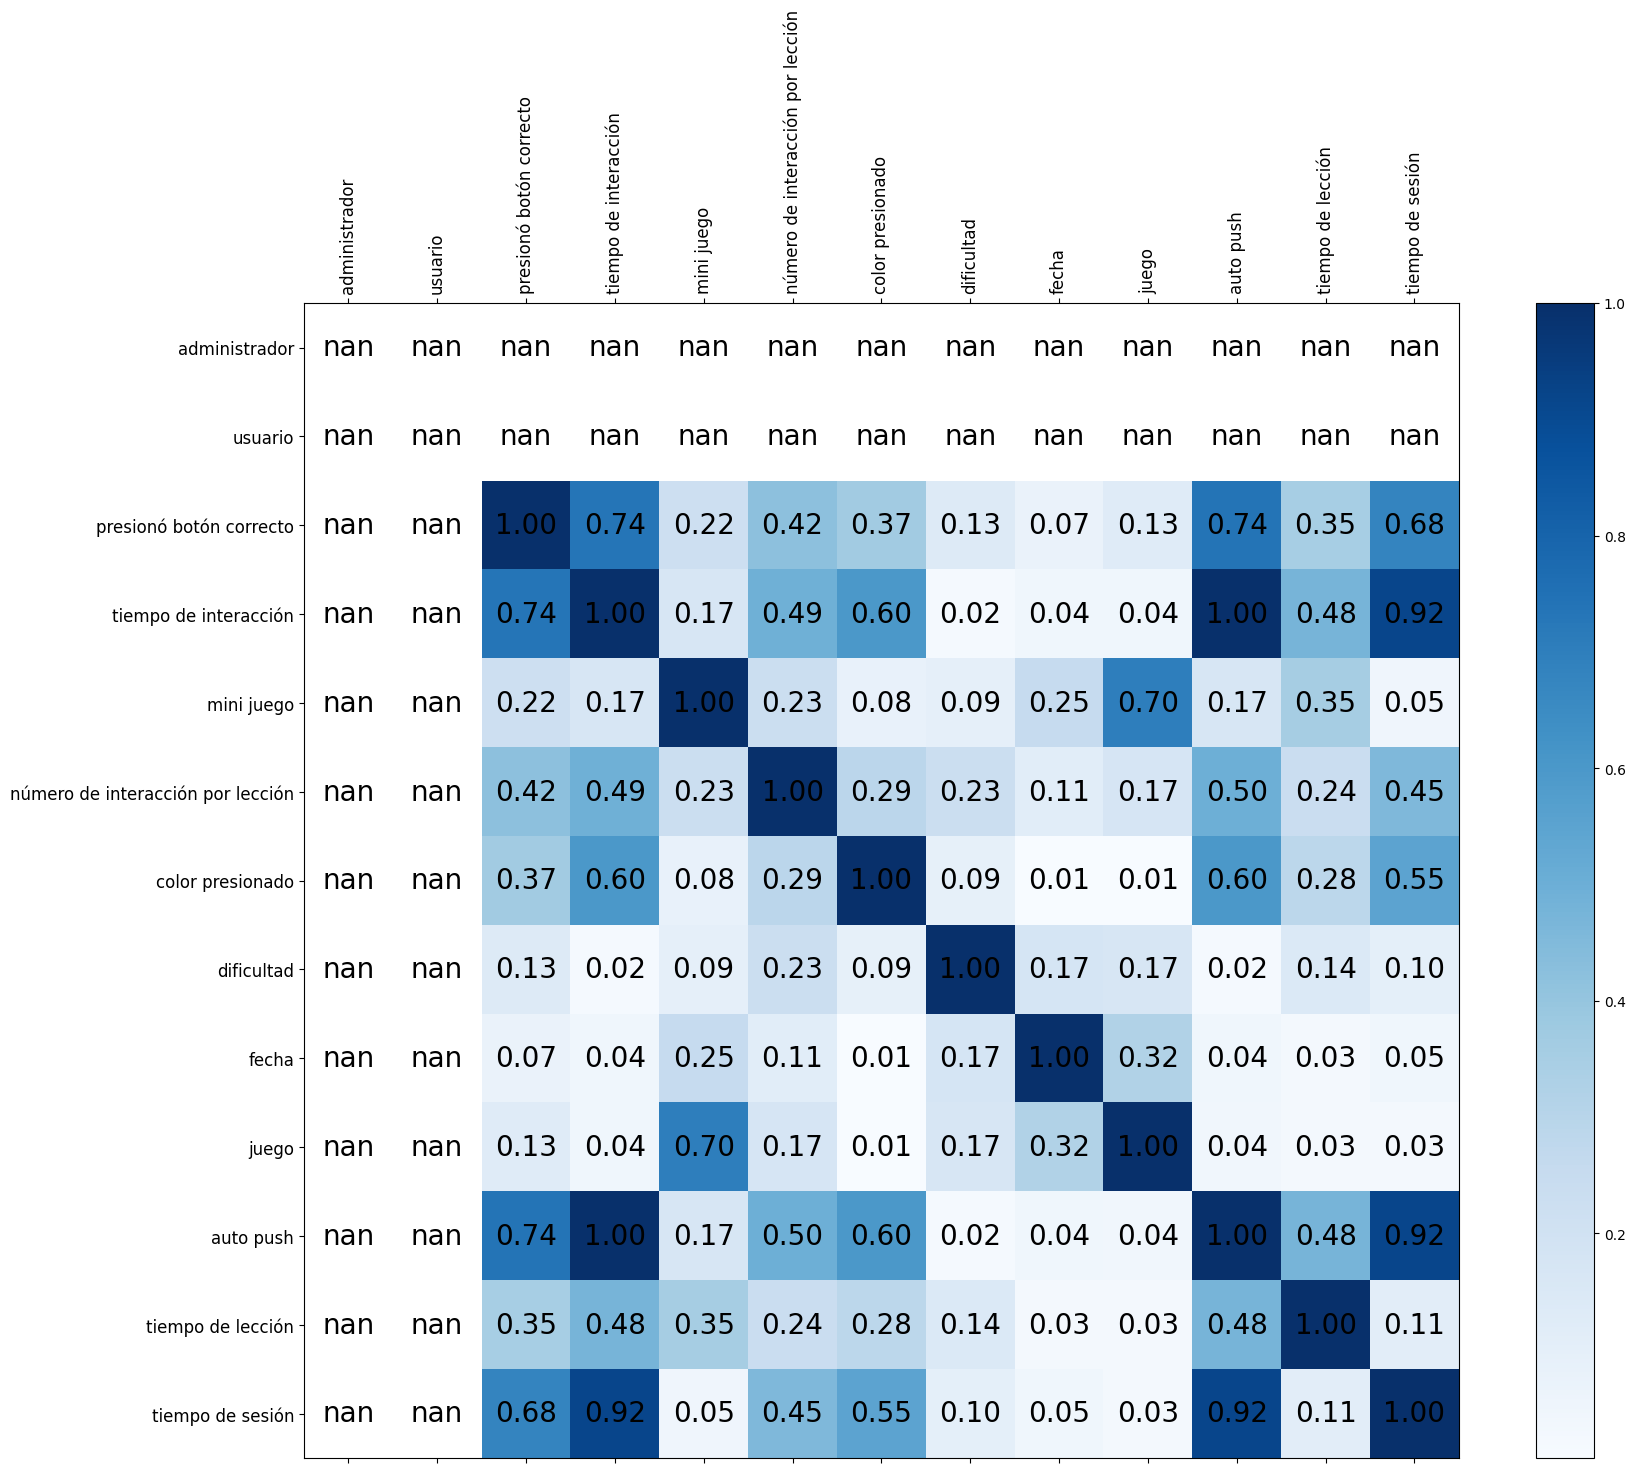

In [99]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_FactorsJA, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_FactorsJA.shape[0]):
    for j in range(corr_FactorsJA.shape[1]):
        ax.text(j, i, f"{corr_FactorsJA.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_FactorsJA.columns)), corr_FactorsJA.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_FactorsJA.index)), corr_FactorsJA.index, fontsize=12)
plt.show()

Los nulos significa que no existe correlación entre las columnas y por eso las llena de valores nulos

***Regresión Multiple de Javier Alejandro***

In [103]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepJA= JA[['tiempo de interacción', 'auto push','tiempo de sesión']]
Var_DepJA= JA['presionó botón correcto']

In [104]:
modelJA= LinearRegression()

In [105]:
modelJA.fit(X=Vars_IndepJA, y=Var_DepJA)

LinearRegression()

In [106]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelJA.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['tiempo de interacción', 'auto push', 'tiempo de sesión'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-4.32536778e-03,  5.68745847e+00,  1.64252450e-16]),
 'rank_': 3,
 'singular_': array([6.23384365e+04, 2.63126220e+03, 1.07525673e-01]),
 'intercept_': np.float64(-4.053874534065499)}

In [107]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
modelJA.score(Vars_IndepJA,Var_DepJA)

0.5441389730924018

In [108]:
coef_DeterJA=modelJA.score(X=Vars_IndepJA, y=Var_DepJA)
coef_DeterJA

0.5441389730924018

In [109]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelJA=np.sqrt(coef_DeterJA)
coef_CorrelJA

np.float64(0.7376577614940426)

In [114]:
# Exportar el dataframe del Filtro Jesus Alejandro
corr_FactorsJA.to_csv('Jesus Alejandro.csv', index=False)